# Sentimental analysis of Federal Reserve FOMC meeting minutes using FinBert

## Install FedTools and transformers packages

In [1]:
! pip install FedTools
! pip install transformers
! pip install yfinance
! pip install nltk

     -------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 11.6/11.6 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 64.9/64.9 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 508.0/508.0 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 346.6/346.6 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 167.3/167.3 kB 5.1 MB/s eta 0:00:00
     -------------------------------------- 126.3/126.3 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 70.4/70.4 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 102.2/102.2 kB 6.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     --------------------------------------- 10.0/10.0 MB 18.9 MB/s eta 0:00:00
     -------------------------------------- 274.0/274.0 kB 8.5 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 5.8 MB/s eta 0:00:00
     ------------------------------------- 285.9/285.9 kB 18.4 MB/s eta 0:00:00
     ------------------------------------- 447.5/447.5 kB 14.1 MB/s eta 0:00:00
     ---------------------------------------- 161.8/161.8 kB ? eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     ------------------------------------- 179.6/179.6 kB 11.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 101.1/101.1 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00
     -------------------------------------- 939.5/939.5 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 3.8/3.8 MB 24.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.7-py3-none-any.whl size=138951 sha256=9eb3c3e4dff562879930ccbacc9cab35b31b2e9454105d2ceb841f9fe3e63bd7
  Stored in directory: c:\users\bhusa\appdata\local\pip\cache\wheels\8d\0e\f8\48eb93a200fca4c502d7590613616fa4d2c9533f7308f9e28a
Successfully built peewee



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import packages

In [7]:
from FedTools import MonetaryPolicyCommittee
from FedTools import BeigeBooks
from FedTools import FederalReserveMins
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
import numpy as np
import nltk
from nltk import tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from datetime import date
import time
import yfinance as yf
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime
from pytz import timezone, utc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhusa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bhusa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


## Web Scrap Federal Reserve Open Market Committee Meeting minutes

In [2]:
# Define the detail of scrapping
fed_mins = FederalReserveMins(
            main_url = 'https://www.federalreserve.gov',
            calendar_url ='https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm',
            start_year = 2003,
            historical_split = 2017,
            verbose = True,
            thread_num = 10)

# Put the scrapped result to a DataFrame
dataset = fed_mins.find_minutes()

Constructing links between 2003 and 2024
Extracting Federal Reserve Minutes.
Retrieving articles.
.........................................................................................................................................................................

## Define the natual language processing detail of FinBert

In [18]:
! pip install torch

     ---------------------------------------- 1.6/1.6 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 25.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import torch


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import the pretrained classifer and tokenizer of Bert from FinBert online source
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

# Build up the NLP pipeline with the pretrained classifer model and tokenizer from above
nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

c:\Users\bhusa\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bhusa\.cache\huggingface\hub\models--yiyanghkust--finbert-tone. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


## Divide the dataset into 3 different dataset for easier processing

In [5]:
dataset0313 = dataset[dataset.index < '2014-01-01']
dataset1422 = dataset[(dataset.index > '2013-12-31')&(dataset.index < '2022-12-31')]
dataset2323 = dataset[dataset.index >= '2023-01-01']

## Calculate the positiveness of the meeting minutes
Use nlp setting from above to interate through each sentences of every meeting minutes.
<br> Calculate "(no. of positive sentences - no. of negative sentences)/total number of sentences in a minute" for each minutes <br>
CSV file of positiveness between 2003 to 2022 is provided in github.

### Optional: Calculation of positiveness of 2003 to 2022 (CSV file can be found in Github)

In [ ]:
date_list = dataset0313.index.tolist()
data_positiveness0313 = dataset0313
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness0313.loc[date,"positiveness"]=positiveness
data_positiveness0313.to_csv("positiveness0313.csv")
data_positiveness0313

In [ ]:
date_list = dataset1422.index.tolist()
data_positiveness1422 = dataset1422
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness1422.loc[date,"positiveness"]=positiveness
data_positiveness1422.to_csv("positiveness1422.csv")
data_positiveness1422

### Calculation of positiveness of 2023

In [ ]:
data_positiveness1422 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness1422.csv")
date_list = dataset2323.index.tolist()
data_positiveness2323 = dataset2323
for date in date_list:
    sentence_list = tokenize.sent_tokenize(dataset.loc[date,'Federal_Reserve_Mins'])
    positive_sent=0
    sentence_list=[sent for sent in sentence_list if len(sent) <= 500]
    for sentence in sentence_list:
        nlp_result = pd.DataFrame(nlp(sentence))
        positive_sent += 1 if nlp_result.loc[0,"label"] == "Positive" else -1 if nlp_result.loc[0,"label"] == "Negative" else 0
    positiveness = positive_sent/len(sentence_list)
    data_positiveness2323.loc[date,"positiveness"]=positiveness

data_positiveness2323

## Import the dataset from csv

In [19]:
data_positiveness0313 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness0313.csv")
data_positiveness1422 = pd.read_csv("C:/Users/bhusa/Documents/SEM 7/DS 340W/positiveness1422.csv")
#Combine all three subset
data_positiveness=pd.concat([data_positiveness0313, data_positiveness1422], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness=pd.concat([data_positiveness, data_positiveness2323], ignore_index=False)
data_positiveness.index = pd.to_datetime(data_positiveness.index)
data_positiveness

,Unnamed: 0,Federal_Reserve_Mins,positiveness
1970-01-01 00:00:00.000000000,2003-01-29,"The Federal Reserve, the central bank of the U...",0.045643
1970-01-01 00:00:00.000000001,2003-03-18,A meeting of the Federal Open Market Committee...,-0.174863
1970-01-01 00:00:00.000000002,2003-05-06,A meeting of the Federal Open Market Committee...,-0.250891
1970-01-01 00:00:00.000000003,2003-06-25,A meeting of the Federal Open Market Committee...,-0.092429
1970-01-01 00:00:00.000000004,2003-08-12,A meeting of the Federal Open Market Committee...,-0.042229
...,...,...,...
2024-03-20 00:00:00.000000000,NaN,"The Federal Reserve, the central bank of the U...",NaN
2024-05-01 00:00:00.000000000,NaN,"The Federal Reserve, the central bank of the U...",NaN
2024-06-12 00:00:00.000000000,NaN,"The Federal Reserve, the central bank of the U...",NaN
2024-07-31 00:00:00.000000000,NaN,"The Federal Reserve, the central bank of the U...",NaN


## Get the history of S&P 500 etf(ticker = SPY):

In [20]:
date = datetime.now(tz=utc)
today = date.astimezone(timezone('US/Pacific'))
today_date = today.strftime("%Y-%m-%d")

# Set up the date range of history price
start_date = "2003-01-01"
end_date = today_date

# Retrieve
ticker = "^GSPC"
yfdata=yf.download(ticker,start_date,end_date)
SP500_df = yfdata[["Close"]]
SP500_df = SP500_df.reset_index()

# Prepare a column of growth removed "Close"
SP500_df['row_num'] = SP500_df.index
multi_factor = (SP500_df.iloc[-1]['Close'] / SP500_df.iloc[0]['Close']) ** (1 / len(SP500_df))
SP500_df['Untrended_Close']=SP500_df['Close']*(1/(multi_factor**SP500_df['row_num']))

# Prepare column of 6 month reutrn, 1 year return and 2 year return
SP500_df['6m_return']=(SP500_df['Close'].shift(-126)-SP500_df['Close'])/SP500_df['Close']
SP500_df['1y_return']=(SP500_df['Close'].shift(-252)-SP500_df['Close'])/SP500_df['Close'] # 1year is approximately have 252 trading days
SP500_df['2y_return']=(SP500_df['Close'].shift(-504)-SP500_df['Close'])/SP500_df['Close']
SP500_df['3y_return']=(SP500_df['Close'].shift(-756)-SP500_df['Close'])/SP500_df['Close']
# Make Date as index
SP500_df = SP500_df.set_index(SP500_df.columns[0])

SP500_df

[*********************100%***********************]  1 of 1 completed


ValueError: Cannot set a DataFrame with multiple columns to the single column Untrended_Close

## Visualization of sentiment of FOMC meeting


[notice] A new release of pip available: 22.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00


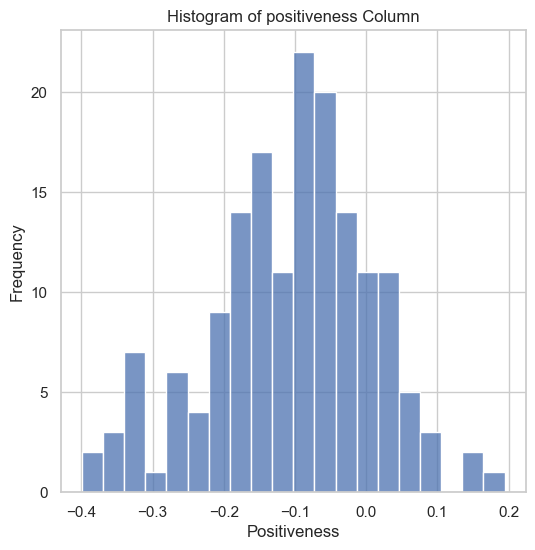

In [22]:
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
# Setting the style for seaborn for the plot
sns.set(style="whitegrid")

# Creating a histogram
sns.histplot(data_positiveness['positiveness'], bins=20, kde=False)

# Giving the histogram a title
plt.title('Histogram of positiveness Column')

# Providing labels
plt.xlabel('Positiveness')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

## Does the sentiment of the meeting minutes correlated with the market?

### Plot of SP500 and sentiment

In [24]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
# we already handled the x-label with ax1
ax1.set_ylabel('SP500', color=color)
ax1.plot(SP500_df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
# we already handled the x-label with ax1
ax2.set_ylabel('Positiveness', color=color)
ax2.plot(data_positiveness["positiveness"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

KeyboardInterrupt: 

### Plot of sentiment and S&P500(removed growth)

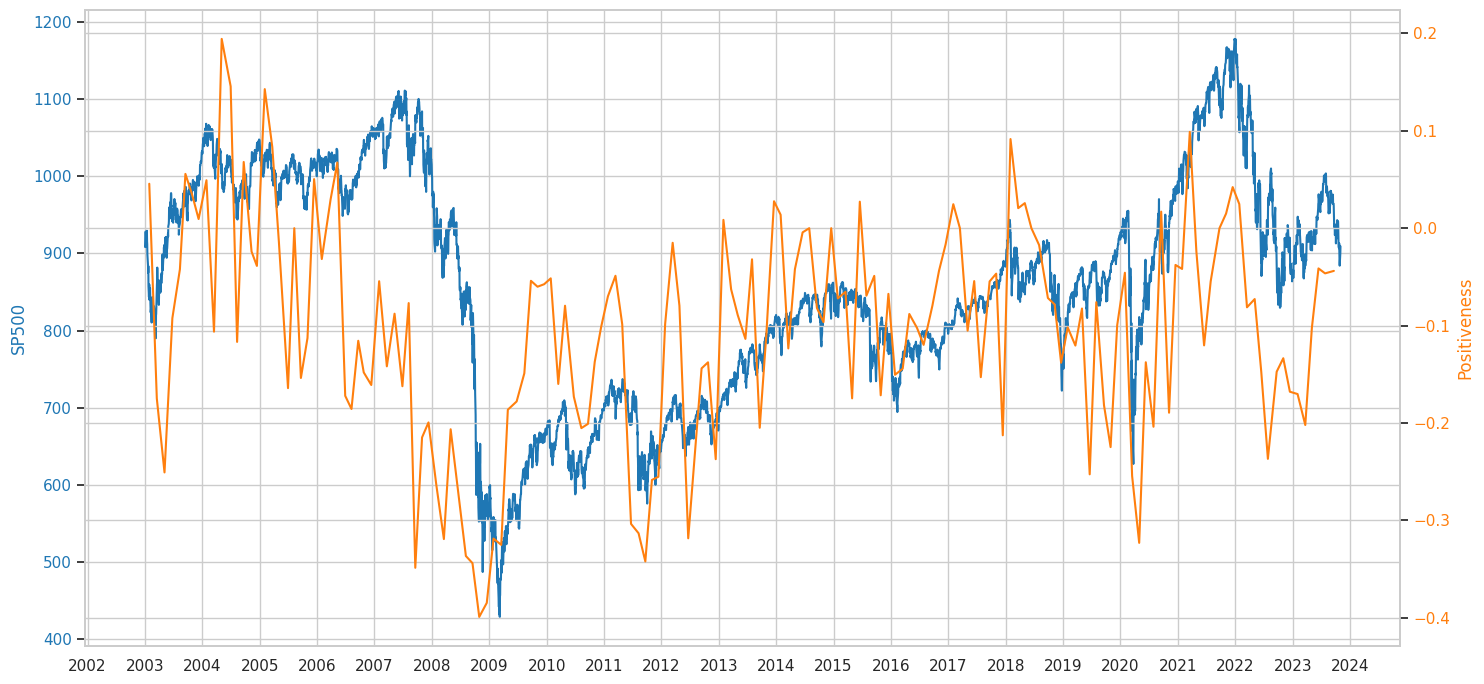

In [11]:
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
# we already handled the x-label with ax1
ax1.set_ylabel('SP500', color=color)
ax1.plot(SP500_df['Untrended_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
# we already handled the x-label with ax1
ax2.set_ylabel('Positiveness', color=color)
ax2.plot(data_positiveness["positiveness"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()

## Scatter plot of 6 month return and positiveness

In [23]:
# Subset data_positiveness
data_positiveness_subset = data_positiveness[data_positiveness.index.isin(SP500_df.index)]

# Subset SP500_df
SP500_df_subset = SP500_df[SP500_df.index.isin(data_positiveness.index)]

# Now both DataFrames are subsetted to contain the same indices

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_positiveness_subset["positiveness"], SP500_df_subset["6m_return"])
plt.axhline(0, color='red')
plt.axvline(-0.2, color='green')
plt.xlabel('Positiveness')
plt.ylabel('6m_return')
plt.title('Scatter Plot')
plt.show()

KeyError: '6m_return'

<Figure size 1000x600 with 0 Axes>

In [13]:
combine_6M = SP500_df_subset.join(data_positiveness_subset)
negative_6M = combine_6M[combine_6M["positiveness"] <= -0.2]
ER_6M = negative_6M["6m_return"].mean()
SD_6M = negative_6M["6m_return"].std()
SP500_df_clean = SP500_df.dropna()
regER_6M=SP500_df_clean["6m_return"].mean()
regSD_6M=SP500_df_clean["6m_return"].std()
count_pos_negative_6M = (negative_6M["6m_return"] >= 0).sum()
count_neg_negative_6M = (negative_6M["6m_return"] < 0).sum()
count_pos_combine_6M = (combine_6M["6m_return"] >= 0).sum()
count_neg_combine_6M = (combine_6M["6m_return"] < 0).sum()
prob_negative_6M = count_pos_negative_6M/(count_pos_negative_6M+count_neg_negative_6M)
prob_combine_6M = count_pos_combine_6M/(count_pos_combine_6M+count_neg_combine_6M)
correlation_6M = combine_6M["6m_return"].corr(combine_6M["positiveness"])
print(f"The expected return of investing 6M when FOMC have bad sentiment is {ER_6M}")
print(f"Regular expected return of investing 6M is {regER_6M}")
print(f"The standard deviation of investing 6M when FOMC have bad sentiment is {SD_6M}")
print(f"Regular standard deviation of return in investing 6M is {regSD_6M}")
print(f"The probability of getting a positive 6M return when FOMC have bad sentiment is {prob_negative_6M}")
print(f"Regular probability of getting a positive 6M return is {prob_combine_6M}")



The expected return of investing 6M when FOMC have bad sentiment is 0.027730739829784457
Regular expected return of investing 6M is 0.04770795808437329
The standard deviation of investing 6M when FOMC have bad sentiment is 0.16203944560746145
Regular standard deviation of return in investing 6M is 0.10821287957900405
The probability of getting a positive 6M return when FOMC have bad sentiment is 0.6666666666666666
Regular probability of getting a positive 6M return is 0.7515527950310559


## Scatter plot of 1 Year return and positiveness

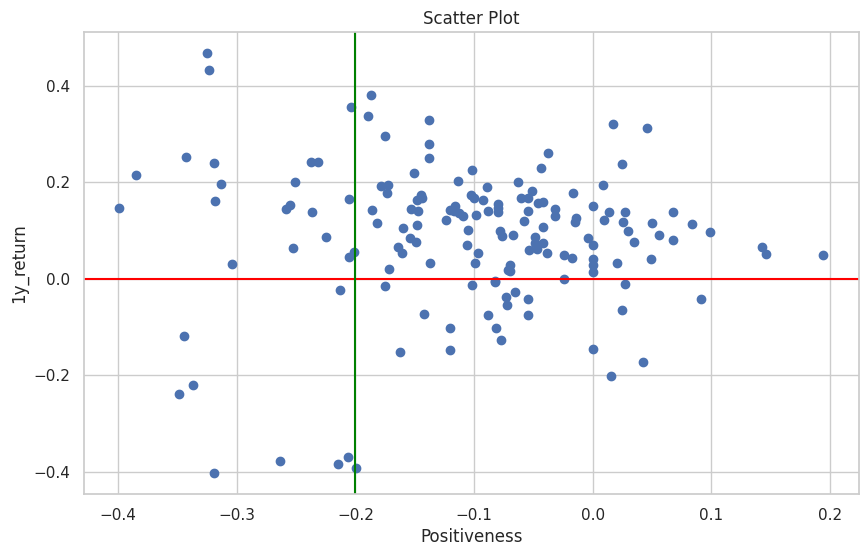

In [14]:
# Subset data_positiveness
data_positiveness_subset = data_positiveness[data_positiveness.index.isin(SP500_df.index)]

# Subset SP500_df
SP500_df_subset = SP500_df[SP500_df.index.isin(data_positiveness_subset.index)]

# Now both DataFrames are subsetted to contain the same indices

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_positiveness_subset["positiveness"], SP500_df_subset["1y_return"])
plt.axhline(0, color='red')
plt.axvline(-0.2, color='green')
plt.xlabel('Positiveness')
plt.ylabel('1y_return')
plt.title('Scatter Plot')
plt.show()

In [15]:
combine_1Y = SP500_df_subset.join(data_positiveness_subset)
negative_1Y = combine_1Y[combine_1Y["positiveness"] <= -0.2]
ER_1Y = negative_1Y["1y_return"].mean()
SD_1Y = negative_1Y["1y_return"].std()
SP500_df_clean = SP500_df.dropna()
regER_1Y=SP500_df_clean["1y_return"].mean()
regSD_1Y=SP500_df_clean["1y_return"].std()
count_pos_negative_1Y = (negative_1Y["1y_return"] >= 0).sum()
count_neg_negative_1Y = (negative_1Y["1y_return"] < 0).sum()
count_pos_combine_1Y = (combine_1Y["1y_return"] >= 0).sum()
count_neg_combine_1Y = (combine_1Y["1y_return"] < 0).sum()
prob_negative_1Y = count_pos_negative_1Y/(count_pos_negative_1Y+count_neg_negative_1Y)
prob_combine_1Y = count_pos_combine_1Y/(count_pos_combine_1Y+count_neg_combine_1Y)
print(f"The expected return of investing 6M when FOMC have bad sentiment is {ER_1Y}")
print(f"Regular expected return of investing 6M is {regER_1Y}")
print(f"The standard deviation of investing 6M when FOMC have bad sentiment is {SD_1Y}")
print(f"Regular standard deviation of return in investing 6M is {regSD_1Y}")
print(f"The probability of getting a positive 6M return when FOMC have bad sentiment is {prob_negative_1Y}")
print(f"Regular probability of getting a positive 6M return is {prob_combine_1Y}")

The expected return of investing 6M when FOMC have bad sentiment is 0.06547581206329994
Regular expected return of investing 6M is 0.0972778849671928
The standard deviation of investing 6M when FOMC have bad sentiment is 0.24176130624688946
Regular standard deviation of return in investing 6M is 0.1560904718038072
The probability of getting a positive 6M return when FOMC have bad sentiment is 0.7241379310344828
Regular probability of getting a positive 6M return is 0.8012820512820513


#Conclusion
Investor should stay away from the period that FOMC meetings show bad sentiment. The lower than regular expected return and higher than regular standard deviation under bad sentiment periods indicate that when the meeting show bad sentiment, investing is at higher risk and lower return.<br>
On the opposite, one way to take advantage from the result of this analysis is to invest in put option, as the low expected return and high standard deviation in S&P500 might indicate an opportunity to make a profit with put option.

##Reference
Yi, Y. (2020, June 10). FinBERT-tone. Retrieved July 5, 2023, from https://huggingface.co/yiyanghkust/finbert-tone. <br>
Huang, A., Wang, H., & Yang, Y. (2023). FinBERT: A Large Language Model for Extracting Information from Financial Text. Retrieved July 5, 2023, from https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3910214 <br>
FedTools. (20223). Retrieved July 5, 2023, from https://pypi.org/project/Fedtools/
